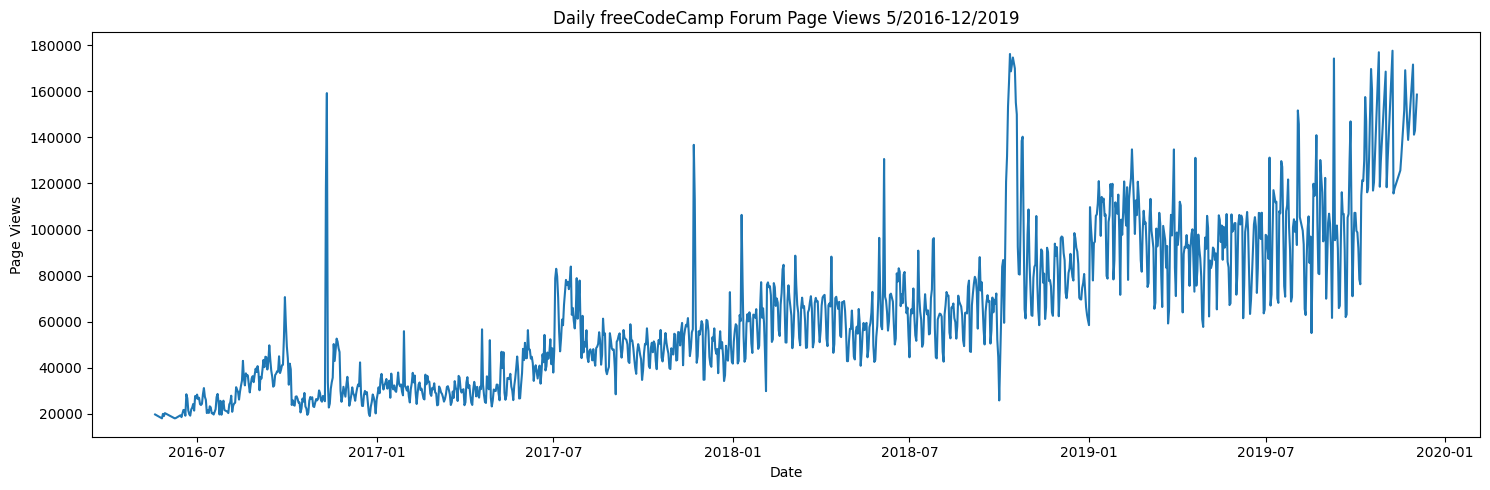

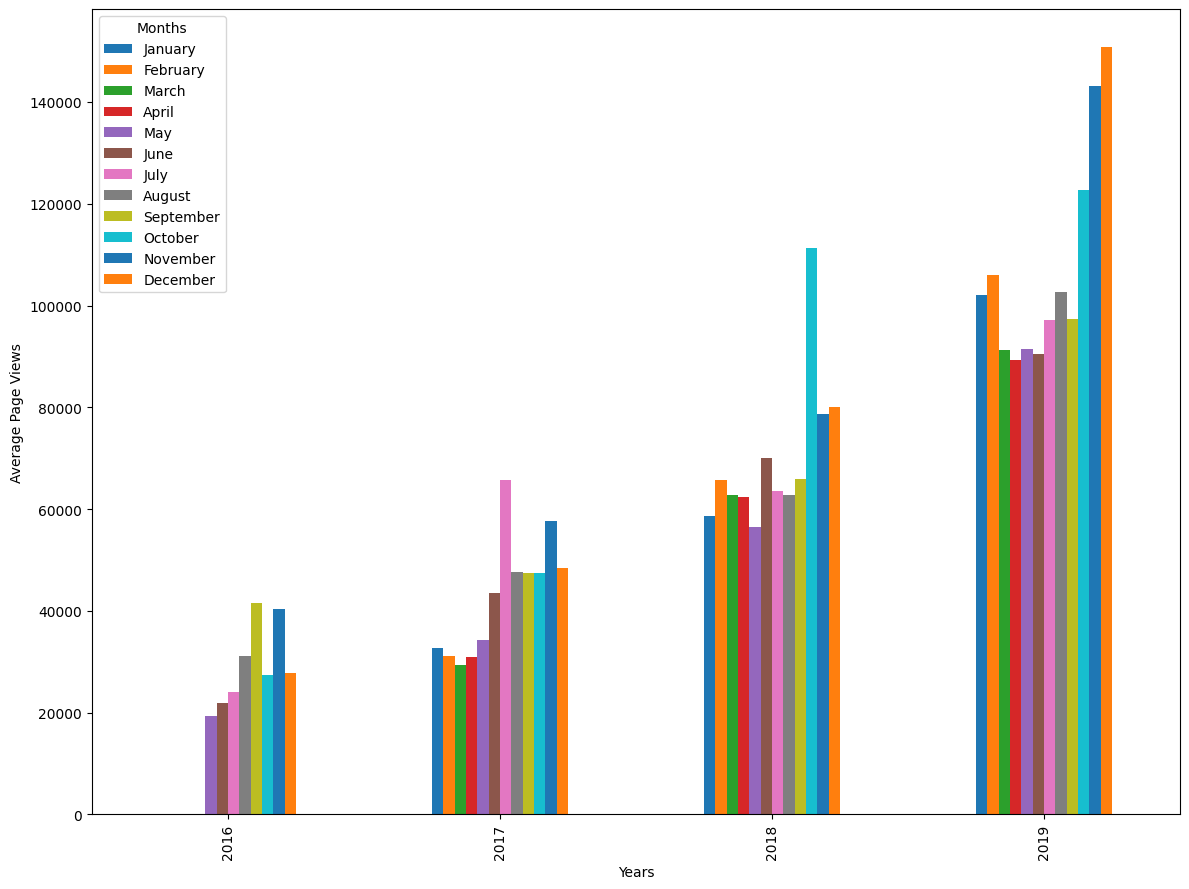

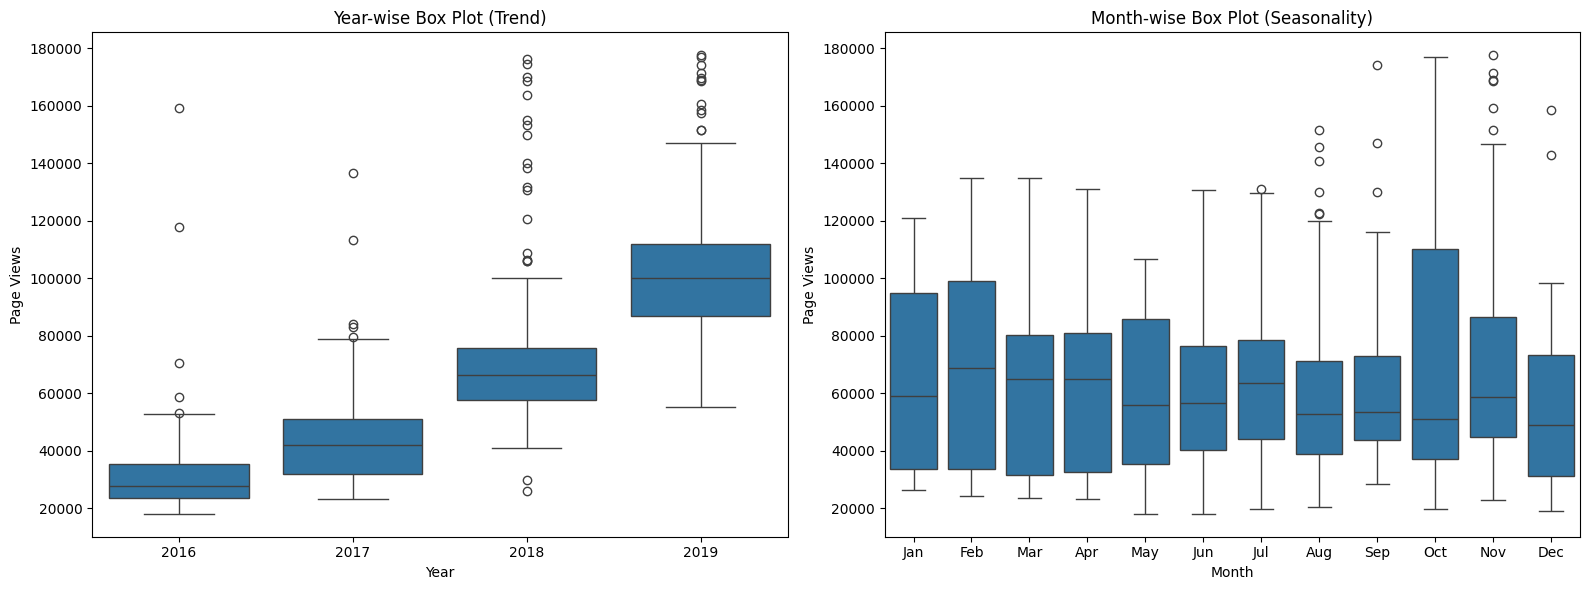

Arquivos salvos: ['line_plot.png', 'box_plot.png', 'bar_plot.png']


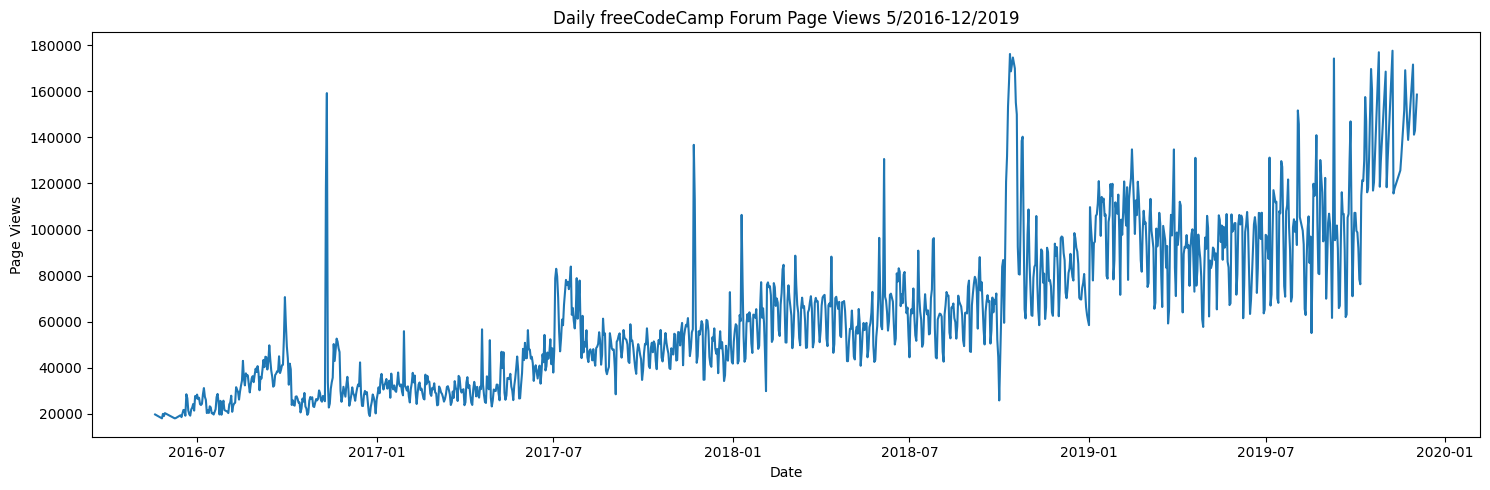

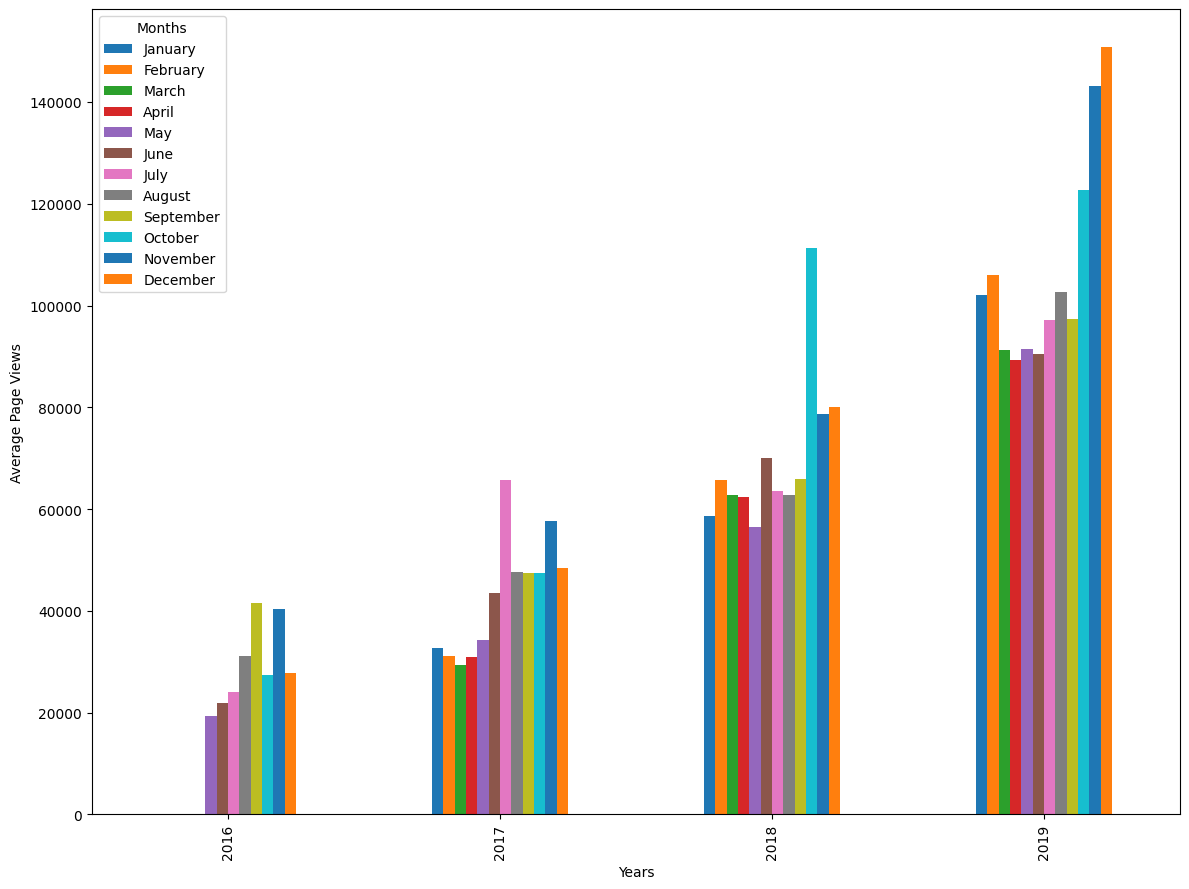

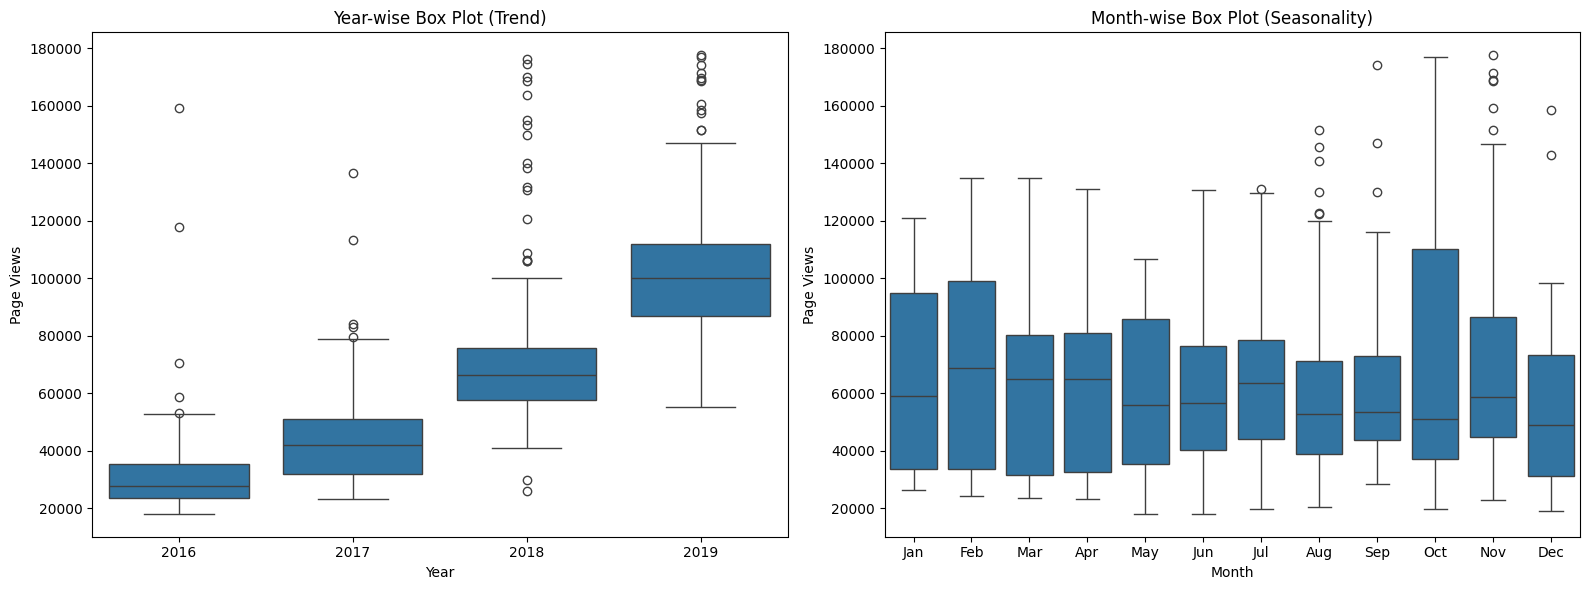

In [1]:
# --- Time Series Visualizer (freeCodeCamp) ---

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# 1) Ler CSV e usar a coluna de data como índice
assert os.path.exists("fcc-forum-pageviews.csv"), "Envie ou baixe fcc-forum-pageviews.csv para o diretório do Colab."
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")

# 2) Limpeza: remover os 2.5% menores e 2.5% maiores
low = df["value"].quantile(0.025)
high = df["value"].quantile(0.975)
df = df[(df["value"] >= low) & (df["value"] <= high)]

def draw_line_plot():
    df_line = df.copy()
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df_line.index, df_line["value"])
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    fig.tight_layout()
    fig.savefig("line_plot.png", bbox_inches="tight")
    return fig

def draw_bar_plot():
    df_bar = df.copy()
    df_bar["Year"] = df_bar.index.year
    df_bar["Month"] = df_bar.index.month_name()

    # Pivot: média mensal por ano (colunas ordenadas Jan..Dec)
    month_order = ["January","February","March","April","May","June",
                   "July","August","September","October","November","December"]
    pivot = (df_bar
             .pivot_table(values="value", index="Year", columns="Month", aggfunc="mean")
             .reindex(columns=month_order))

    ax = pivot.plot(kind="bar", figsize=(12, 9))
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")
    ax.legend(title="Months")
    fig = ax.get_figure()
    fig.tight_layout()
    fig.savefig("bar_plot.png", bbox_inches="tight")
    return fig

def draw_box_plot():
    # Preparar dados
    df_box = df.copy().reset_index()
    df_box["year"] = df_box["date"].dt.year
    df_box["month"] = df_box["date"].dt.strftime("%b")
    df_box["month_num"] = df_box["date"].dt.month

    # Ordem Jan..Dec
    month_abbr_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    df_box = df_box.sort_values("month_num")

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Year-wise
    sns.boxplot(ax=axes[0], data=df_box, x="year", y="value")
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    # Month-wise
    sns.boxplot(ax=axes[1], data=df_box, x="month", y="value", order=month_abbr_order)
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    fig.tight_layout()
    fig.savefig("box_plot.png", bbox_inches="tight")
    return fig

# --- gerar e mostrar os gráficos ---
plt.close('all')
fig1 = draw_line_plot();  display(fig1)
fig2 = draw_bar_plot();   display(fig2)
fig3 = draw_box_plot();   display(fig3)

print("Arquivos salvos:", [f for f in os.listdir() if f.endswith(".png")])
